In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

In [6]:
def load_and_prepare_data(file_path):
    """Load and prepare the dataset"""
    df = pd.read_csv(file_path)
    
    # Convert review time to datetime
    df['reviewTime'] = pd.to_datetime(df['reviewTime'])
    
    # Extract helpful votes
    df['helpful_votes'] = df['helpful'].apply(lambda x: eval(x)[0] if isinstance(x, str) else x[0])
    df['total_votes'] = df['helpful'].apply(lambda x: eval(x)[1] if isinstance(x, str) else x[1])
    
    return df

In [7]:
def plot_rating_distribution(df):
    """Plot the distribution of ratings"""
    plt.figure(figsize=(12, 6))
    
    # Rating distribution
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='overall')
    plt.title('Distribution of Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    
    # Rating distribution as percentage
    plt.subplot(1, 2, 2)
    df['overall'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
    plt.title('Rating Distribution (%)')
    
    plt.tight_layout()
    plt.show()

In [8]:
def analyze_review_length(df):
    """Analyze review text length"""
    df['review_length'] = df['reviewText'].str.len()
    
    plt.figure(figsize=(15, 5))
    
    # Review length distribution
    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x='review_length', bins=50)
    plt.title('Distribution of Review Lengths')
    plt.xlabel('Review Length')
    
    # Review length vs rating
    plt.subplot(1, 3, 2)
    sns.boxplot(data=df, x='overall', y='review_length')
    plt.title('Review Length by Rating')
    plt.xlabel('Rating')
    plt.ylabel('Review Length')
    
    # Average review length by rating
    plt.subplot(1, 3, 3)
    df.groupby('overall')['review_length'].mean().plot(kind='bar')
    plt.title('Average Review Length by Rating')
    plt.xlabel('Rating')
    plt.ylabel('Average Length')
    
    plt.tight_layout()
    plt.show()

In [9]:
def analyze_helpful_votes(df):
    """Analyze helpful votes patterns"""
    plt.figure(figsize=(15, 5))
    
    # Distribution of helpful votes
    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x='helpful_votes', bins=30)
    plt.title('Distribution of Helpful Votes')
    plt.xlabel('Number of Helpful Votes')
    
    # Helpful votes by rating
    plt.subplot(1, 3, 2)
    sns.boxplot(data=df, x='overall', y='helpful_votes')
    plt.title('Helpful Votes by Rating')
    plt.xlabel('Rating')
    plt.ylabel('Number of Helpful Votes')
    
    # Average helpful votes by rating
    plt.subplot(1, 3, 3)
    df.groupby('overall')['helpful_votes'].mean().plot(kind='bar')
    plt.title('Average Helpful Votes by Rating')
    plt.xlabel('Rating')
    plt.ylabel('Average Helpful Votes')
    
    plt.tight_layout()
    plt.show()

In [10]:
def temporal_analysis(df):
    """Analyze review patterns over time"""
    # Resample data by month
    monthly_reviews = df.resample('M', on='reviewTime').size()
    monthly_ratings = df.resample('M', on='reviewTime')['overall'].mean()
    
    plt.figure(figsize=(15, 5))
    
    # Review volume over time
    plt.subplot(1, 2, 1)
    monthly_reviews.plot()
    plt.title('Review Volume Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Reviews')
    
    # Average rating over time
    plt.subplot(1, 2, 2)
    monthly_ratings.plot()
    plt.title('Average Rating Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Rating')
    
    plt.tight_layout()
    plt.show()

In [11]:
def reviewer_analysis(df):
    """Analyze reviewer patterns"""
    plt.figure(figsize=(15, 5))
    
    # Number of reviews per reviewer
    plt.subplot(1, 3, 1)
    df['reviewerID'].value_counts().head(10).plot(kind='bar')
    plt.title('Top 10 Reviewers by Number of Reviews')
    plt.xlabel('Reviewer ID')
    plt.ylabel('Number of Reviews')
    
    # Average rating by top reviewers
    plt.subplot(1, 3, 2)
    top_reviewers = df['reviewerID'].value_counts().head(10).index
    df[df['reviewerID'].isin(top_reviewers)].groupby('reviewerID')['overall'].mean().plot(kind='bar')
    plt.title('Average Rating by Top Reviewers')
    plt.xlabel('Reviewer ID')
    plt.ylabel('Average Rating')
    
    # Distribution of number of reviews per reviewer
    plt.subplot(1, 3, 3)
    df['reviewerID'].value_counts().value_counts().plot(kind='bar')
    plt.title('Distribution of Reviews per Reviewer')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Number of Reviewers')
    
    plt.tight_layout()
    plt.show()

In [12]:
def create_summary_dashboard(df):
    """Create a summary dashboard with key metrics"""
    fig = go.Figure()
    
    # Add metrics
    metrics = [
        {'name': 'Total Reviews', 'value': len(df)},
        {'name': 'Average Rating', 'value': df['overall'].mean()},
        {'name': 'Unique Reviewers', 'value': df['reviewerID'].nunique()},
        {'name': 'Average Review Length', 'value': df['reviewText'].str.len().mean()},
        {'name': 'Total Helpful Votes', 'value': df['helpful_votes'].sum()}
    ]
    
    for i, metric in enumerate(metrics):
        fig.add_trace(go.Indicator(
            mode="number",
            value=metric['value'],
            title={"text": metric['name']},
            domain={'row': 0, 'column': i}
        ))
    
    fig.update_layout(
        grid={'rows': 1, 'columns': len(metrics)},
        title_text="Review Analysis Dashboard"
    )
    fig.show()

Generating visualizations...


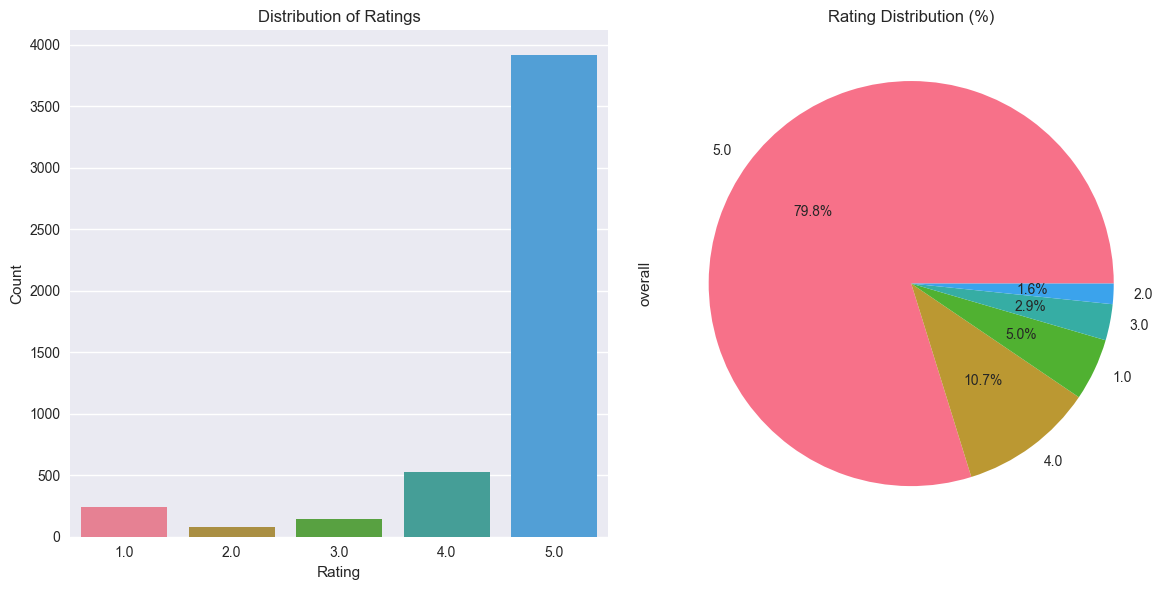

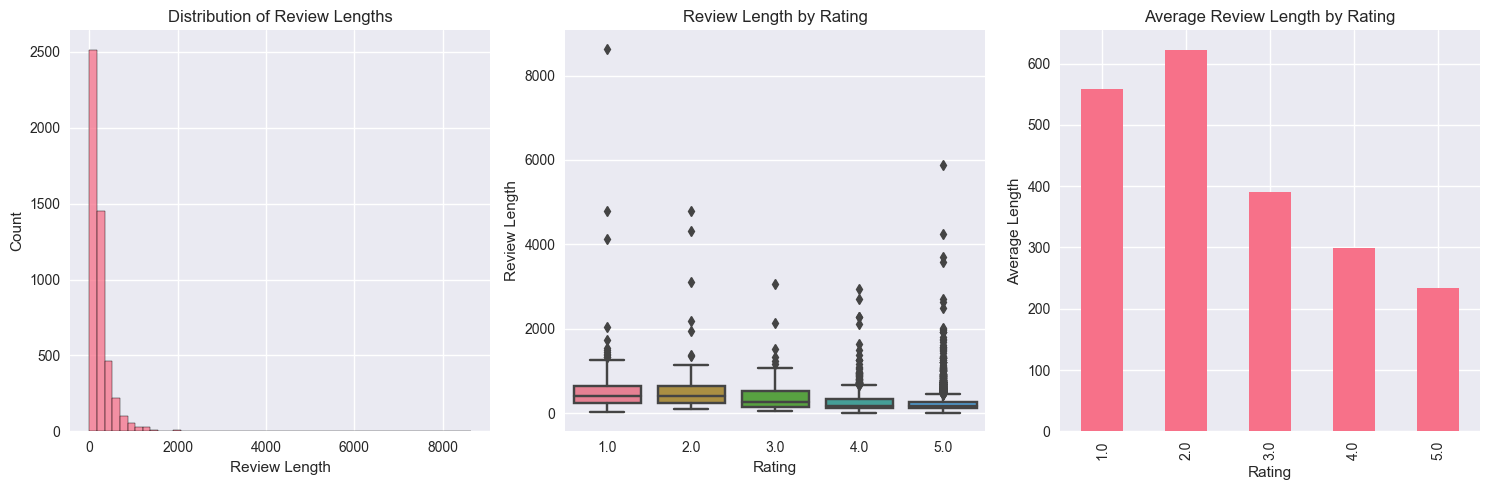

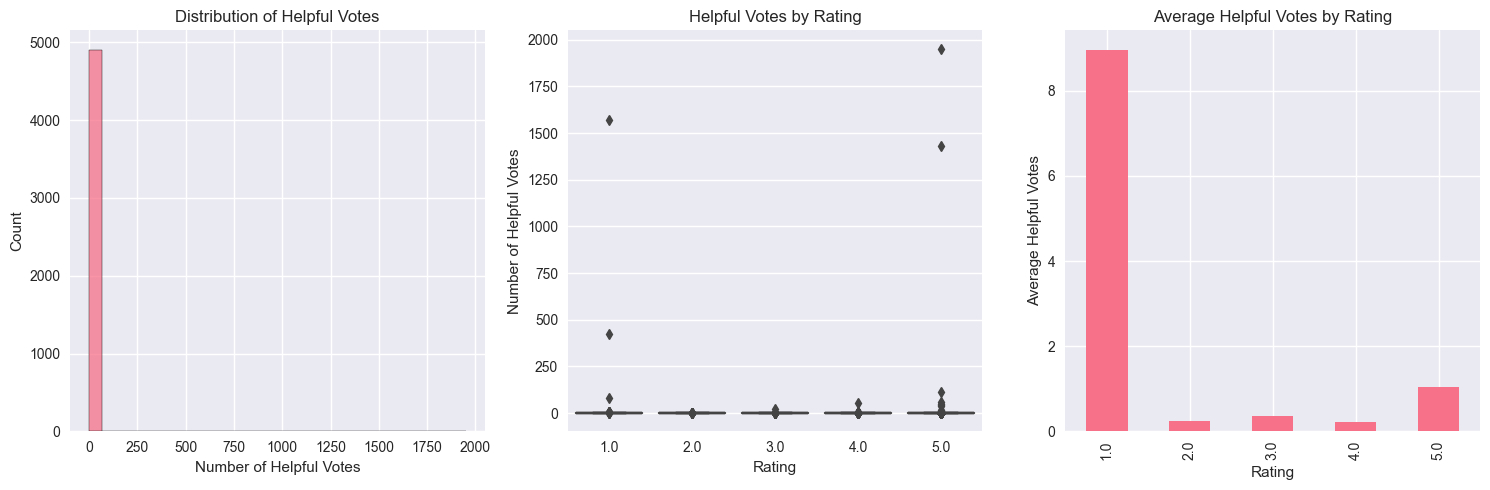

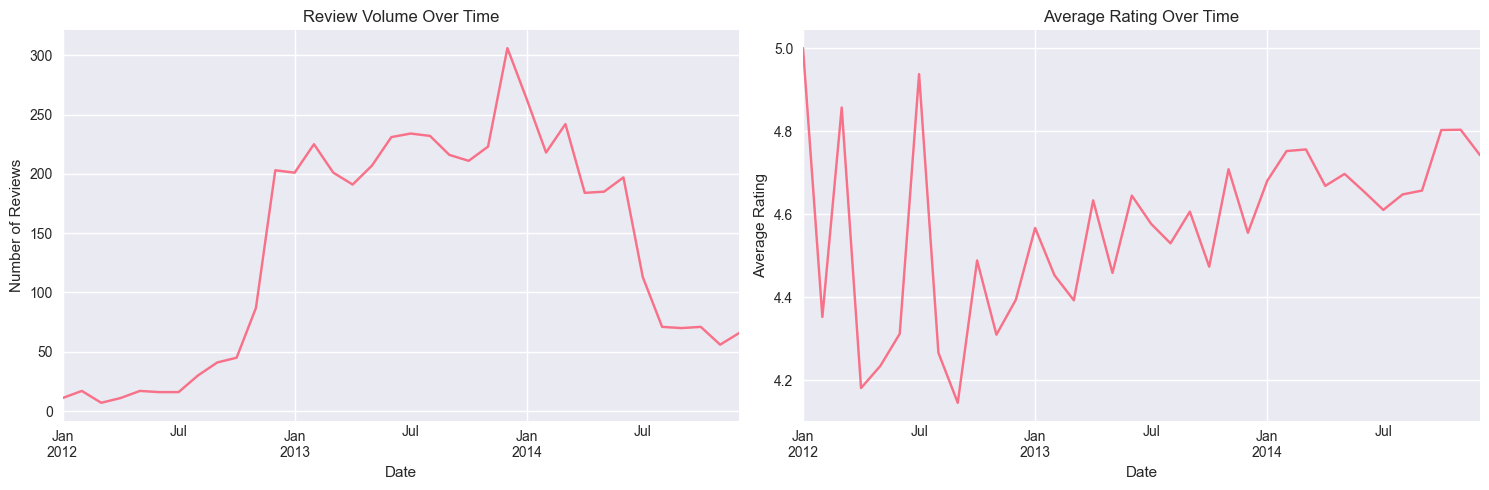

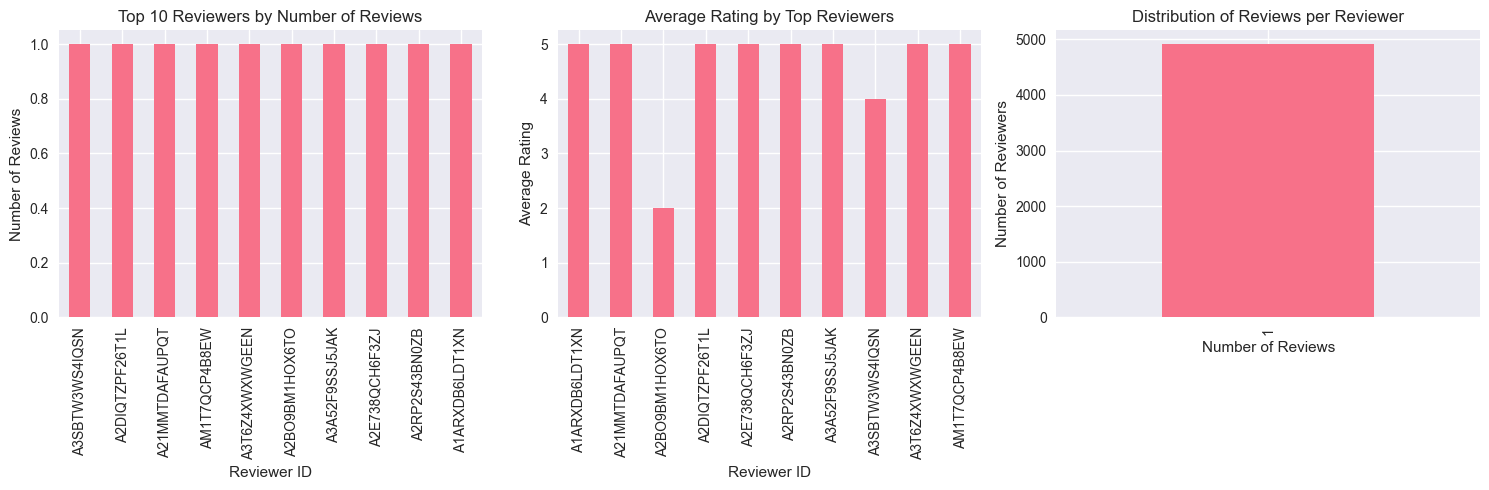

Visualization complete!


In [13]:
def main():
    # Load data
    df = load_and_prepare_data('amazon_review.csv')  # Replace with your file path
    
    # Generate all visualizations
    print("Generating visualizations...")
    
    plot_rating_distribution(df)
    analyze_review_length(df)
    analyze_helpful_votes(df)
    temporal_analysis(df)
    reviewer_analysis(df)
    create_summary_dashboard(df)
    
    print("Visualization complete!")

if __name__ == "__main__":
    main()